In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!unzip /content/drive/MyDrive/Colab\ Notebooks/Dataset/wild_cat.zip

Archive:  /content/drive/MyDrive/Colab Notebooks/Dataset/wild_cat.zip
   creating: wild_cat/
   creating: wild_cat/test/
   creating: wild_cat/test/AFRICAN LEOPARD/
  inflating: wild_cat/test/AFRICAN LEOPARD/1.jpg  
  inflating: wild_cat/test/AFRICAN LEOPARD/2.jpg  
  inflating: wild_cat/test/AFRICAN LEOPARD/3.jpg  
  inflating: wild_cat/test/AFRICAN LEOPARD/4.jpg  
  inflating: wild_cat/test/AFRICAN LEOPARD/5.jpg  
   creating: wild_cat/test/CARACAL/
  inflating: wild_cat/test/CARACAL/1.jpg  
  inflating: wild_cat/test/CARACAL/2.jpg  
  inflating: wild_cat/test/CARACAL/3.jpg  
  inflating: wild_cat/test/CARACAL/4.jpg  
  inflating: wild_cat/test/CARACAL/5.jpg  
   creating: wild_cat/test/CHEETAH/
  inflating: wild_cat/test/CHEETAH/1.jpg  
  inflating: wild_cat/test/CHEETAH/2.jpg  
  inflating: wild_cat/test/CHEETAH/3.jpg  
  inflating: wild_cat/test/CHEETAH/4.jpg  
  inflating: wild_cat/test/CHEETAH/5.jpg  
   creating: wild_cat/test/CLOUDED LEOPARD/
  inflating: wild_cat/test/CLOUDED

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
        rescale=1./255)

validation_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/content/wild_cat/train',  # This is the source directory for training images
        target_size=(128, 128),  # All images will be resized to 150x150
        class_mode='categorical')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/content/wild_cat/valid',  # This is the source directory for training images
        target_size=(128, 128),  # All images will be resized to 150x150
        class_mode='categorical')

Found 2339 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


In [21]:

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(64, activation='relu'))  # other activation function can be sigmoid, tanh
model.add(layers.Dense(10, activation='softmax'))
model.summary()
model.compile(optimizer='adam',
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])     # for binary classification: binary_crossentropy


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_51 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_52 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_53 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 14, 14, 64)     

In [20]:
model_history = model.fit(
train_generator,
epochs = 30,
validation_data=validation_generator)

Epoch 1/30
74/74 [==============================] - 7s 49ms/step - loss: 2.2384 - accuracy: 0.1248 - val_loss: 2.1002 - val_accuracy: 0.1600
Epoch 2/30
74/74 [==============================] - 3s 47ms/step - loss: 1.9161 - accuracy: 0.2390 - val_loss: 1.8469 - val_accuracy: 0.3400
Epoch 3/30
74/74 [==============================] - 4s 59ms/step - loss: 1.7695 - accuracy: 0.3065 - val_loss: 1.7256 - val_accuracy: 0.2600
Epoch 4/30
74/74 [==============================] - 4s 57ms/step - loss: 1.6910 - accuracy: 0.3472 - val_loss: 1.6781 - val_accuracy: 0.4400
Epoch 5/30
74/74 [==============================] - 4s 54ms/step - loss: 1.5688 - accuracy: 0.3968 - val_loss: 1.4819 - val_accuracy: 0.4400
Epoch 6/30
74/74 [==============================] - 8s 105ms/step - loss: 1.4505 - accuracy: 0.4369 - val_loss: 1.7454 - val_accuracy: 0.4000
Epoch 7/30
74/74 [==============================] - 4s 56ms/step - loss: 1.3718 - accuracy: 0.4861 - val_loss: 1.3639 - val_accuracy: 0.5600
Epoch 8/30
7

KeyboardInterrupt: ignored

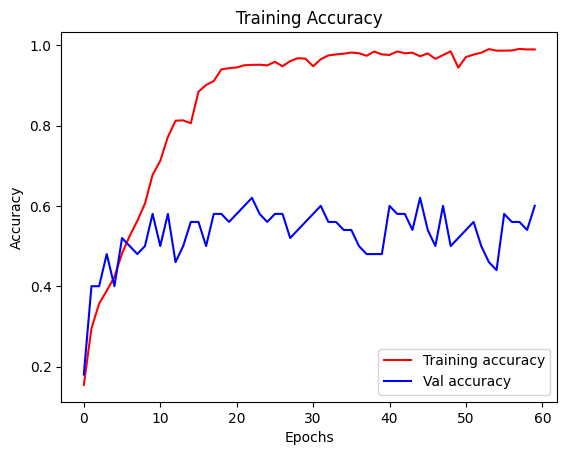

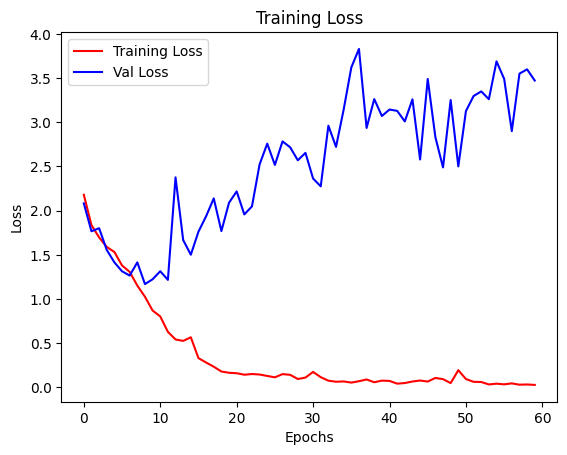

In [9]:
import matplotlib.pyplot as plt
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Val accuracy')
plt.title('Training Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Val Loss')
plt.title('Training Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()